In [49]:
import matplotlib.pyplot as plt
import numpy as np
from ssbc import generate_rigorous_pac_report
import ssbc

In [50]:
p_class1 = 0.10
beta_params_class0 = (2, 7)
beta_params_class1 = (3, 2)

alpha_0 = 0.10
delta_0 = 0.10
alpha_1 = 0.10
delta_1 = 0.10

N_samples = 500

In [51]:
sim = ssbc.BinaryClassifierSimulator(
    p_class1=p_class1, beta_params_class0=beta_params_class0, beta_params_class1=beta_params_class1
)

In [52]:
labels, probs = sim.generate(N_samples)
class_data = ssbc.split_by_class(labels=labels, probs=probs)

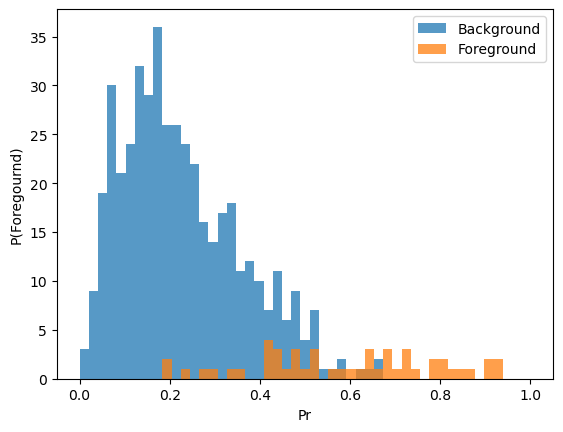

In [53]:
plt.hist(class_data[0]["probs"][:, 1], bins=np.linspace(0, 1, 50), alpha=0.75)
plt.hist(class_data[1]["probs"][:, 1], bins=np.linspace(0, 1, 50), alpha=0.75)
plt.legend(["Background", "Foreground"])
plt.ylabel("P(Foregournd)")
plt.xlabel("Pr")
plt.savefig("tst.png")
plt.show()

In [54]:

# Generate report (now using SIMPLIFIED bounds)
report = generate_rigorous_pac_report(
    labels=labels,
    probs=probs,
    alpha_target=0.10,
    delta=0.10,
    test_size=N_samples,
    ci_level=0.95,
    use_union_bound=False,
    prediction_method="all",
    n_jobs=-1,
    verbose=True,
    loo_inflation_factor=1.5,
    use_loo_correction=True
    
)

Using provided LOO inflation factor: 1.500 (estimated from data: 1.004)
Using provided LOO inflation factor: 1.500 (estimated: 1.004) for comparison...
Using provided inflation factor for Hoeffding: 1.500
Using provided LOO inflation factor: 1.500 (estimated from data: 1.004)
Using provided LOO inflation factor: 1.500 (estimated: 1.004) for comparison...
Using provided inflation factor for Hoeffding: 1.500
Using provided LOO inflation factor: 1.500 (estimated from data: 2.000)
Using provided LOO inflation factor: 1.500 (estimated: 2.000) for comparison...
Using provided inflation factor for Hoeffding: 1.500
Using provided LOO inflation factor: 1.500 (estimated from data: 1.004)
Using provided LOO inflation factor: 1.500 (estimated: 1.004) for comparison...
Using provided inflation factor for Hoeffding: 1.500
Using provided LOO inflation factor: 1.500 (estimated from data: 1.004)
Using provided LOO inflation factor: 1.500 (estimated: 1.004) for comparison...
Using provided inflation fac

In [55]:
validation = ssbc.validate_pac_bounds(
    report=report,
    simulator=sim,
    test_size=N_samples,      # Size of each test set
    n_trials=10000,       # Number of independent trials (increase for better stats)
    seed=42,             # For reproducibility
    verbose=True,
    n_jobs=-1,           # Use all CPU cores
)

ssbc.print_validation_results(validation)


Using fixed thresholds: q̂₀=0.4379, q̂₁=0.8128
Running 10000 trials with test_size=500...
Using all available CPU cores for parallel execution
PREDICTION INTERVAL VALIDATION RESULTS
PAC BOUNDS VALIDATION RESULTS

Trials: 10000
Test size: 500
Thresholds: q̂₀=0.4379, q̂₁=0.8128

MARGINAL

SINGLETON:
  Empirical mean: 0.5576
  Expected (LOO): 0.5660
  Quantiles:      [2.5%: 0.514, 5%: 0.522, 25%: 0.542, 50%: 0.558, 75%: 0.572, 95%: 0.594, 97.5%: 0.600]
  Selected bounds: [0.4540, 0.6760]
  Coverage: 100.0% ✅
  Selected coverage: 100.0% ✅
  Method-specific validation:
    Analytical  : [0.4971, 0.6349] (width: 0.1378, coverage: 99.7%) ✅
    Exact       : [0.4540, 0.6760] (width: 0.2220, coverage: 100.0%) ✅
    Hoeffding   : [0.4187, 0.7133] (width: 0.2945, coverage: 100.0%) ✅

DOUBLET:
  Empirical mean: 0.4424
  Expected (LOO): 0.4340
  Quantiles:      [2.5%: 0.400, 5%: 0.406, 25%: 0.428, 50%: 0.442, 75%: 0.458, 95%: 0.478, 97.5%: 0.486]
  Selected bounds: [0.3260, 0.5480]
  Coverage: 100.

In [56]:
results1 = ssbc.validate_prediction_interval_calibration(
    simulator=sim,
    n_calibration=N_samples,        # Size of each calibration dataset
    BigN=1000,                  # Number of different calibrations to test
    n_trials=1000,             # Test sets per calibration
    test_size=N_samples,
    ci_level=0.95,
    prediction_method="all",  # Compare all methods
    use_loo_correction=True,
    loo_inflation_factor=1.0,
    verbose=False,            # Minimal printouts
    n_jobs=-1,
    seed=0
)
# Print results
df1 = get_calibration_bounds_dataframe(results1)

In [57]:
results15 = ssbc.validate_prediction_interval_calibration(
    simulator=sim,
    n_calibration=N_samples,        # Size of each calibration dataset
    BigN=1000,                  # Number of different calibrations to test
    n_trials=1000,             # Test sets per calibration
    test_size=N_samples,
    ci_level=0.95,
    prediction_method="all",  # Compare all methods
    use_loo_correction=True,
    loo_inflation_factor=1.5,
    verbose=False,            # Minimal printouts
    n_jobs=-1,
    seed=0
)
# Print results
df15 = get_calibration_bounds_dataframe(results15)

In [58]:
results2 = ssbc.validate_prediction_interval_calibration(
    simulator=sim,
    n_calibration=N_samples,        # Size of each calibration dataset
    BigN=1000,                  # Number of different calibrations to test
    n_trials=1000,             # Test sets per calibration
    test_size=N_samples,
    ci_level=0.95,
    prediction_method="all",  # Compare all methods
    use_loo_correction=True,
    loo_inflation_factor=2,
    verbose=False,            # Minimal printouts
    n_jobs=-1,
    seed=0
)
# Print results
df2 = get_calibration_bounds_dataframe(results2)

In [59]:
results25 = ssbc.validate_prediction_interval_calibration(
    simulator=sim,
    n_calibration=N_samples,        # Size of each calibration dataset
    BigN=1000,                  # Number of different calibrations to test
    n_trials=1000,             # Test sets per calibration
    test_size=N_samples,
    ci_level=0.95,
    prediction_method="all",  # Compare all methods
    use_loo_correction=True,
    loo_inflation_factor=2.5,
    verbose=False,            # Minimal printouts
    n_jobs=-1,
    seed=0
)
# Print results
df25 = get_calibration_bounds_dataframe(results25)

In [46]:
from ssbc import validate_prediction_interval_calibration, get_calibration_bounds_dataframe
# Extract DataFrame
df = get_calibration_bounds_dataframe(results)

In [60]:
from ssbc import (
    validate_prediction_interval_calibration,
    get_calibration_bounds_dataframe,
    plot_calibration_excess,
)
def plotter(this_df):
    # Plot excess for singleton marginal
    this_df_0_single = this_df[(this_df['scope'] == 'class_0') & (this_df['metric'] == 'singleton')]
    plot_calibration_excess(this_df_0_single, scope='class_0', metric='singleton', methods=['analytical', 'exact', 'hoeffding'])
    
    this_df_1_single = this_df[(this_df['scope'] == 'class_1') & (this_df['metric'] == 'singleton')]
    plot_calibration_excess(this_df_1_single, scope='class_1', metric='singleton', methods=['analytical', 'exact', 'hoeffding'])
    
    # Plot excess for singleton marginal
    this_df_0_doublet = this_df[(this_df['scope'] == 'class_0') & (this_df['metric'] == 'doublet')]
    plot_calibration_excess(this_df_0_doublet, scope='class_0', metric='doublet', methods=['analytical', 'exact', 'hoeffding'])
    
    this_df_1_doublet = this_df[(this_df['scope'] == 'class_1') & (this_df['metric'] == 'doublet')]
    plot_calibration_excess(this_df_1_doublet, scope='class_1', metric='doublet', methods=['analytical', 'exact', 'hoeffding'])
    
    this_df_m_single_e = this_df[(this_df['scope'] == 'marginal') & (this_df['metric'] == 'singleton_error_class0')]
    plot_calibration_excess(this_df_m_single_e, scope='marginal', metric='singleton_error_class0', methods=['analytical', 'exact', 'hoeffding'])
    
    this_df_m_single_e = this_df[(this_df['scope'] == 'marginal') & (this_df['metric'] == 'singleton_error_class1')]
    plot_calibration_excess(this_df_m_single_e, scope='marginal', metric='singleton_error_class1', methods=['analytical', 'exact', 'hoeffding'])



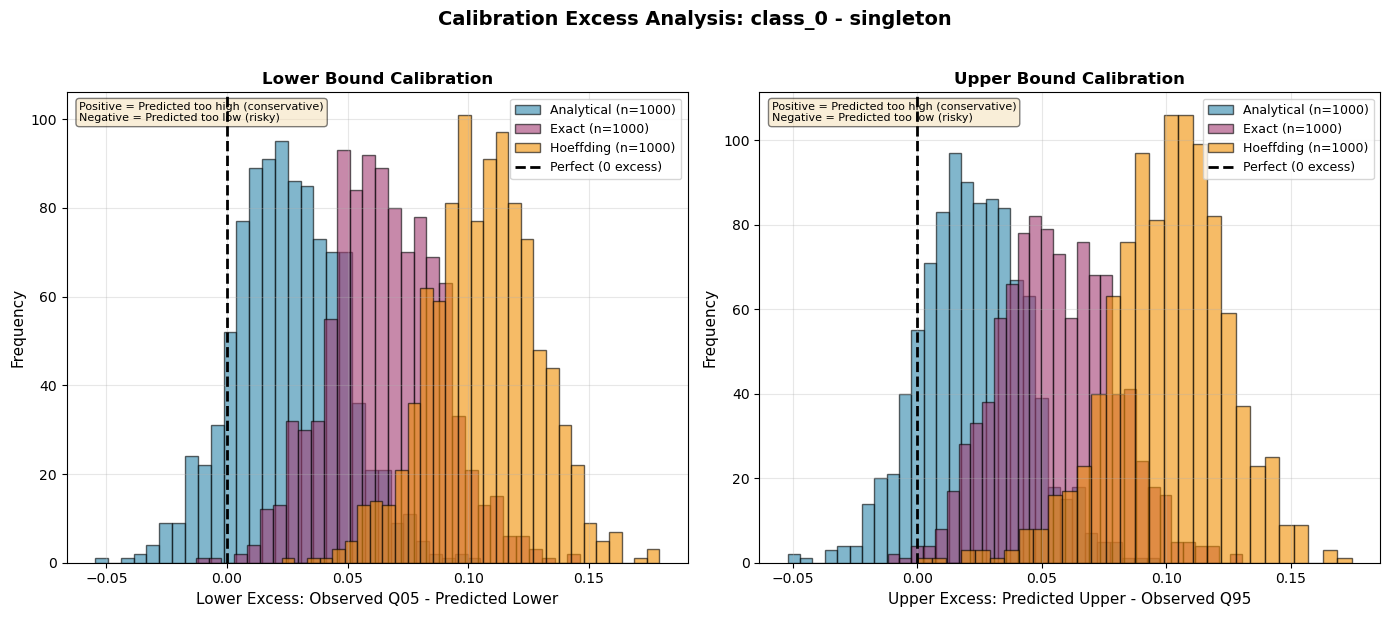

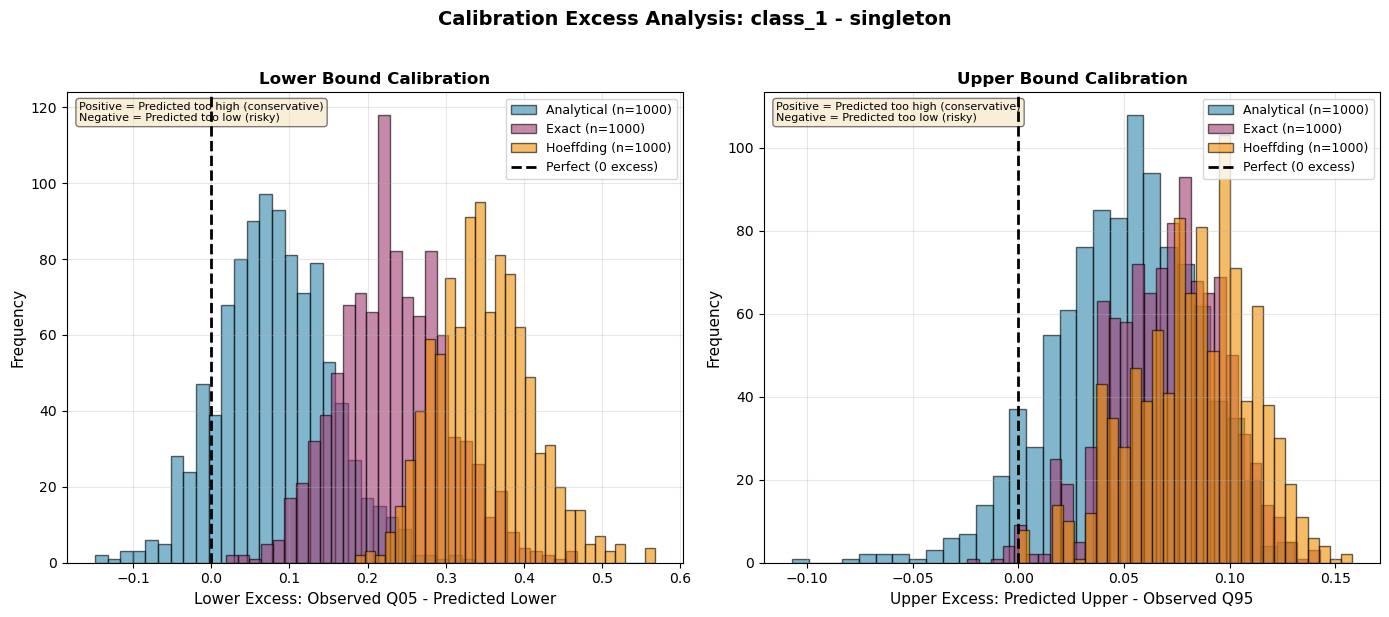

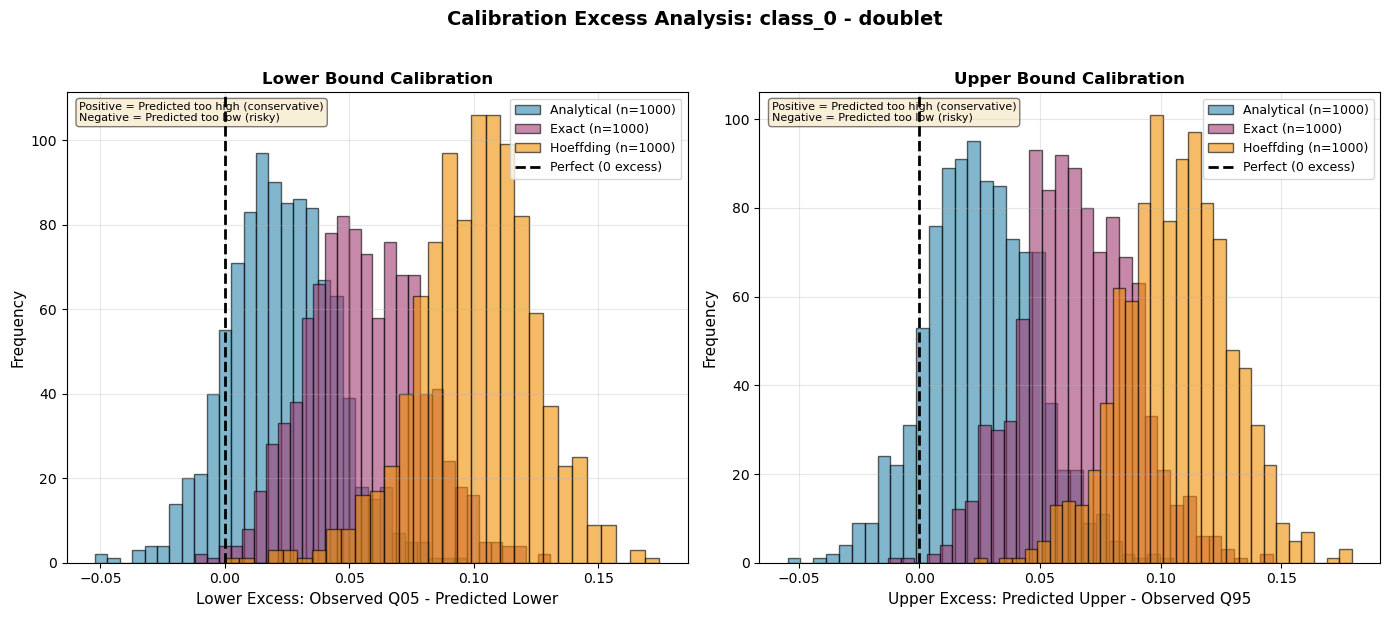

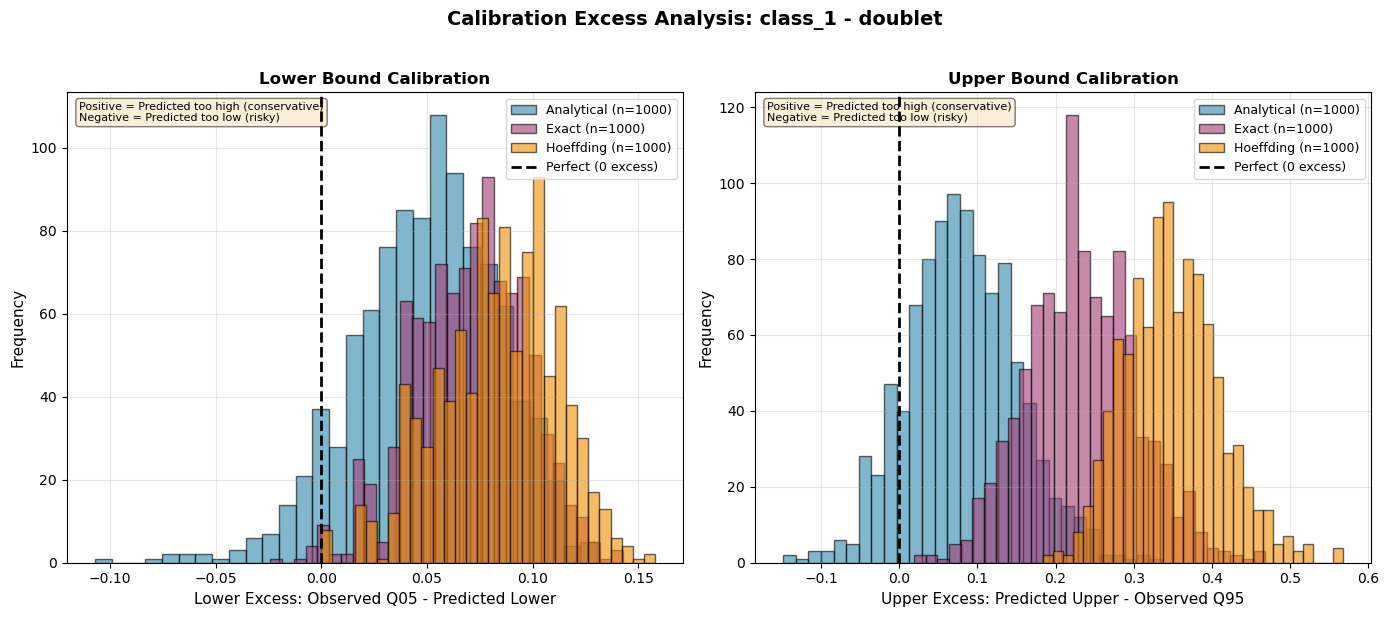

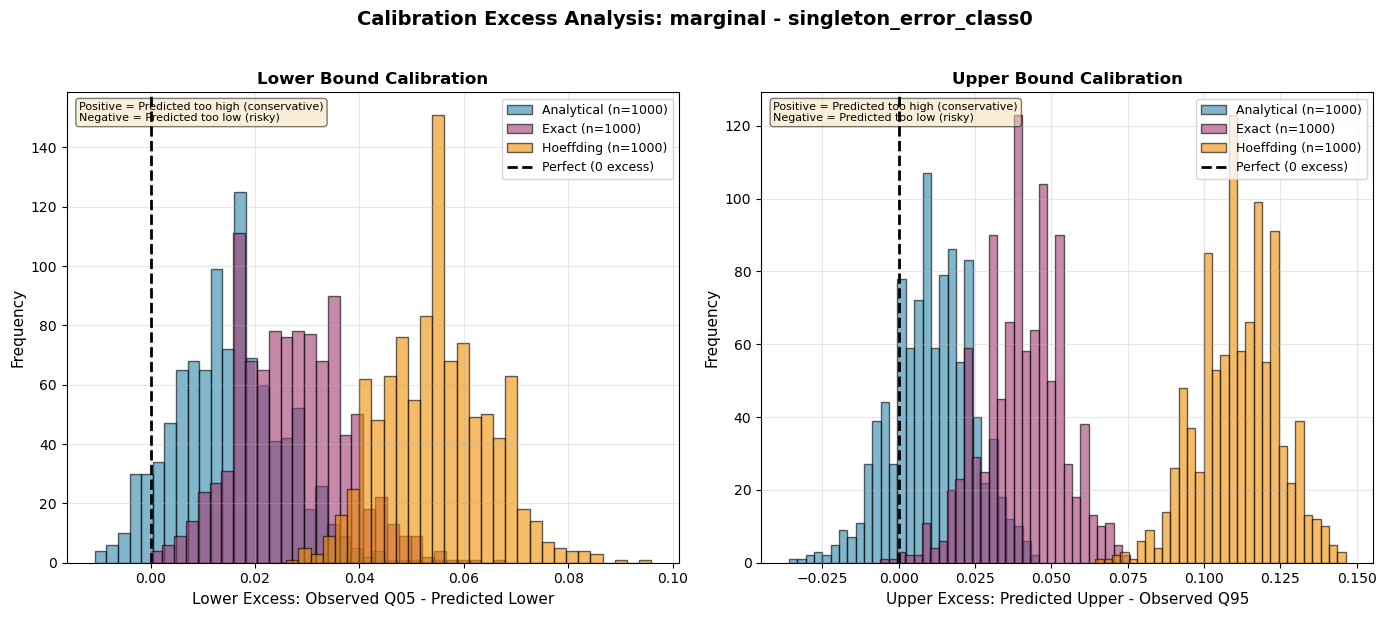

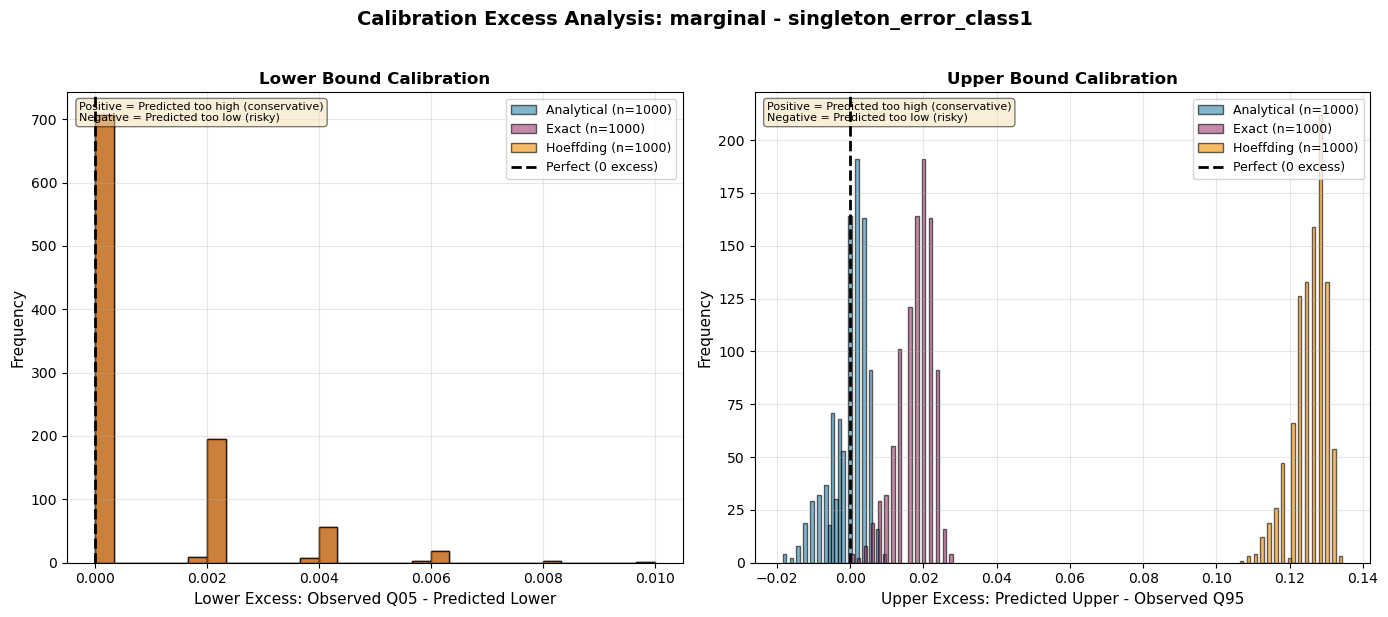

In [61]:
plotter(df1)

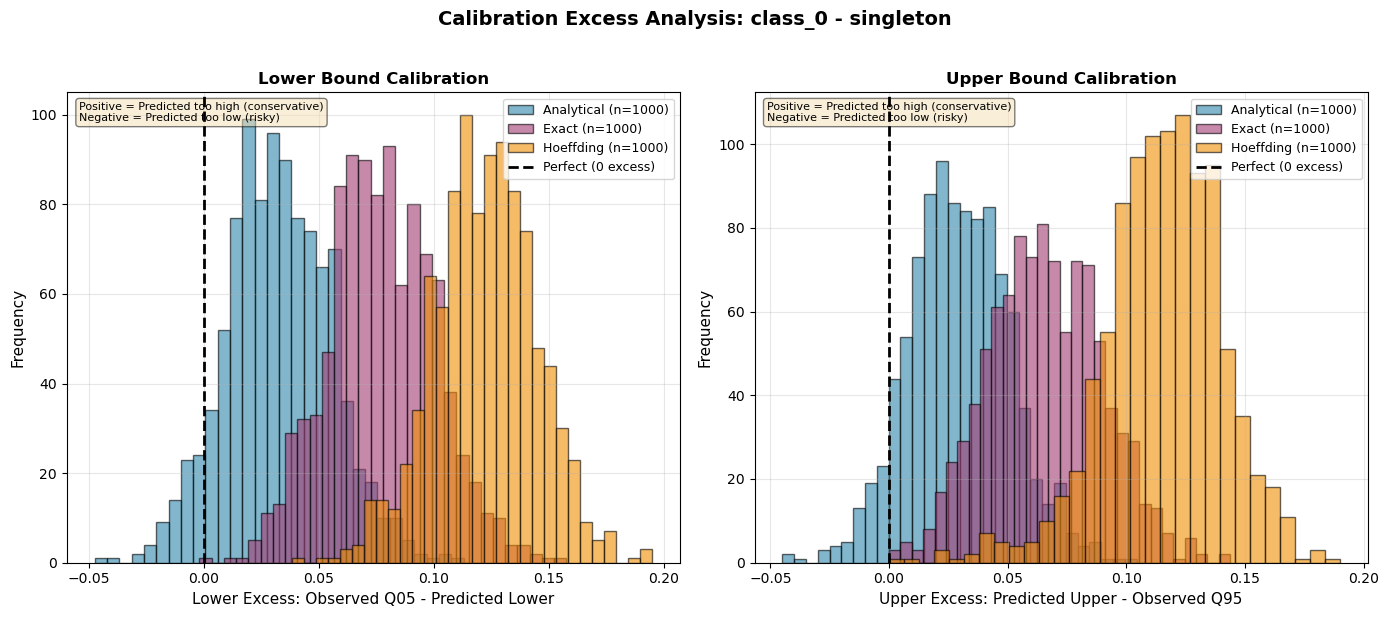

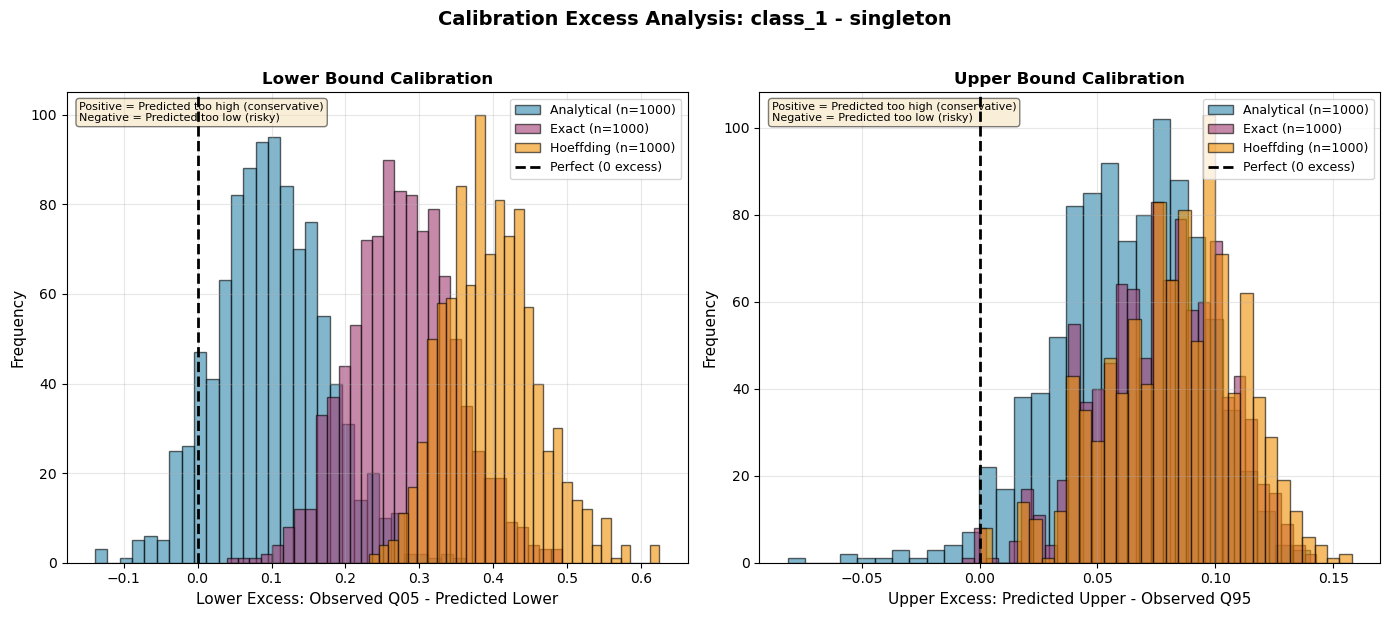

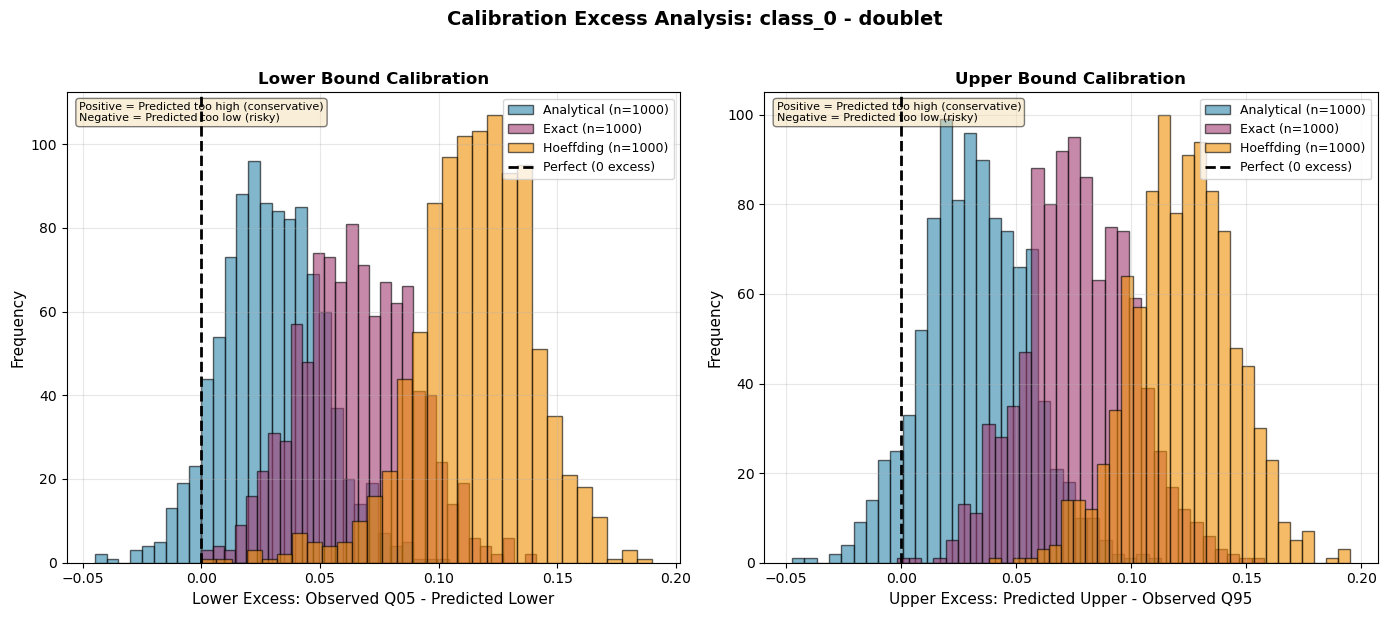

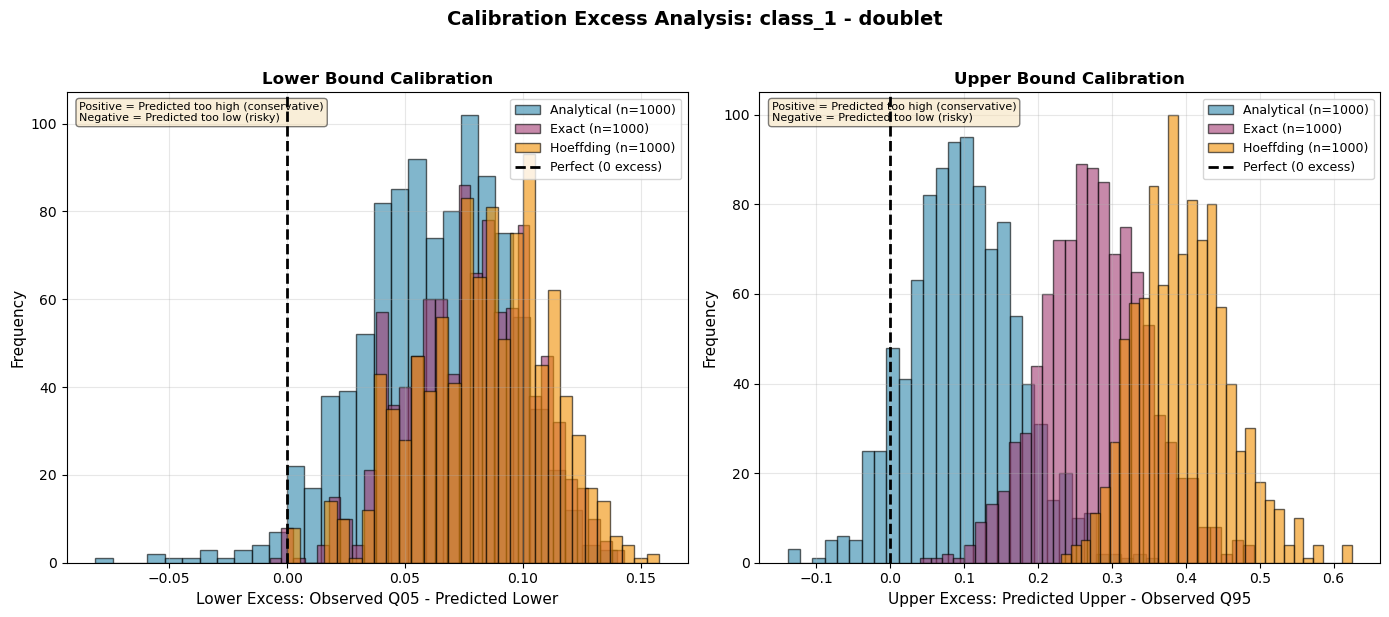

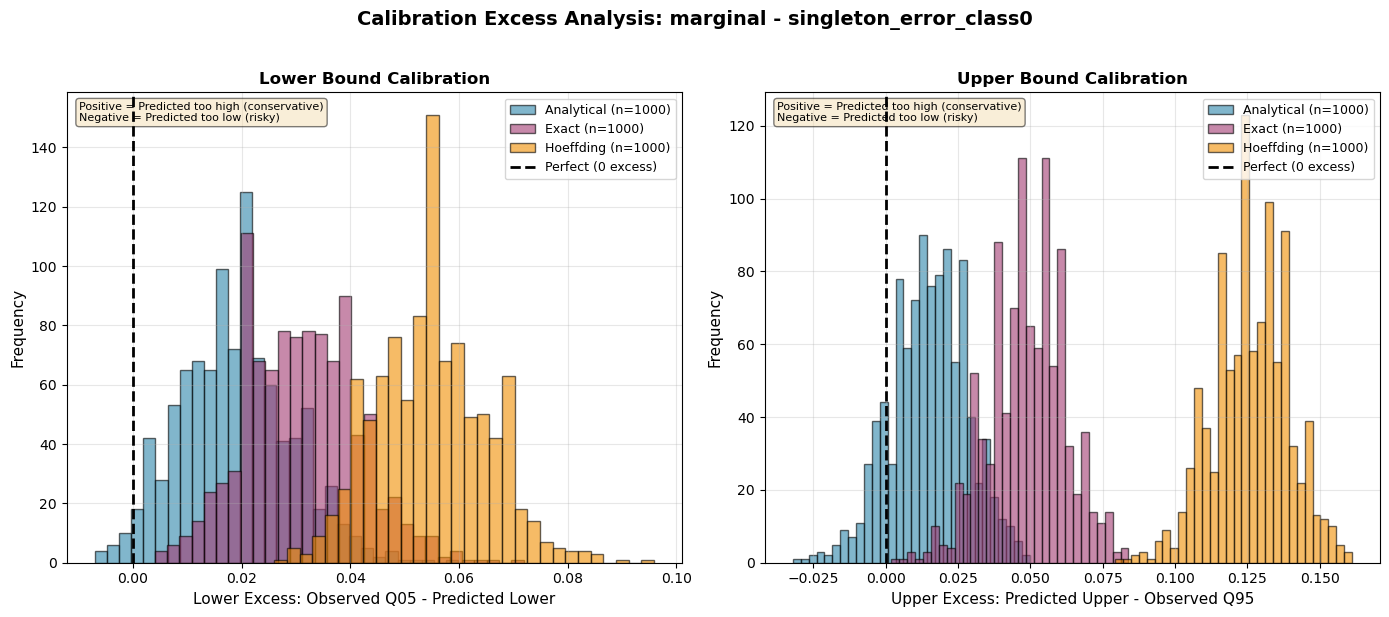

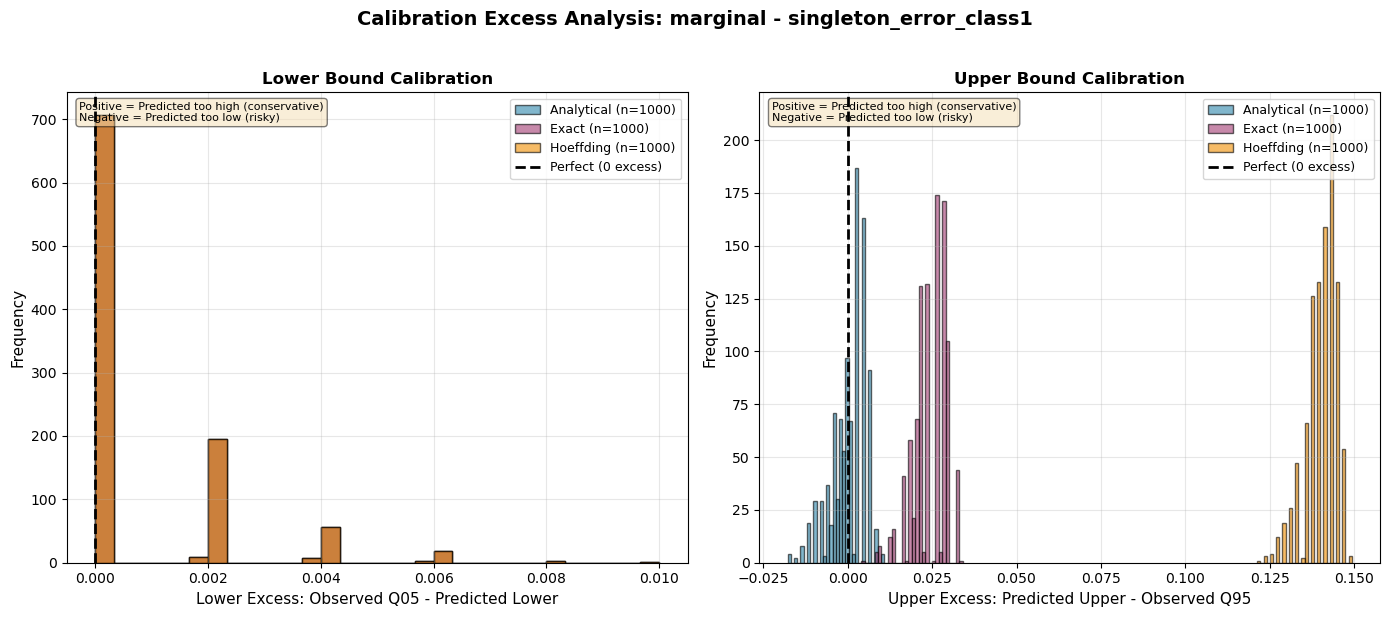

In [62]:
plotter(df15)

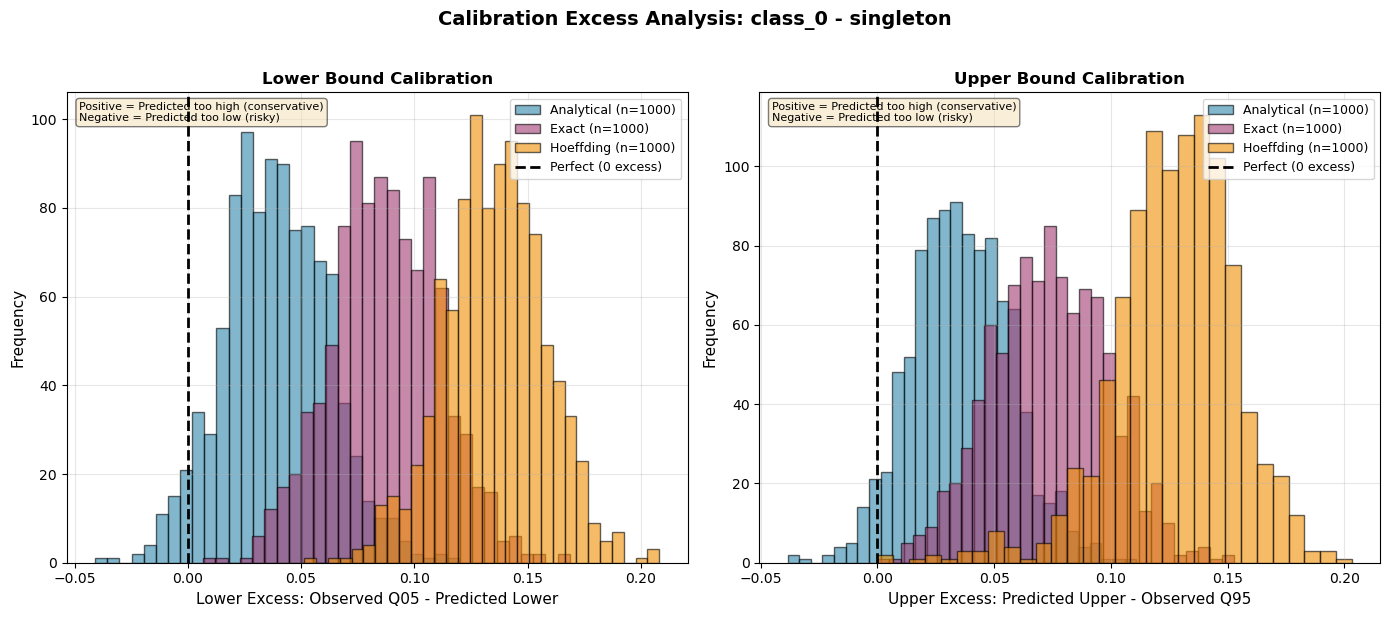

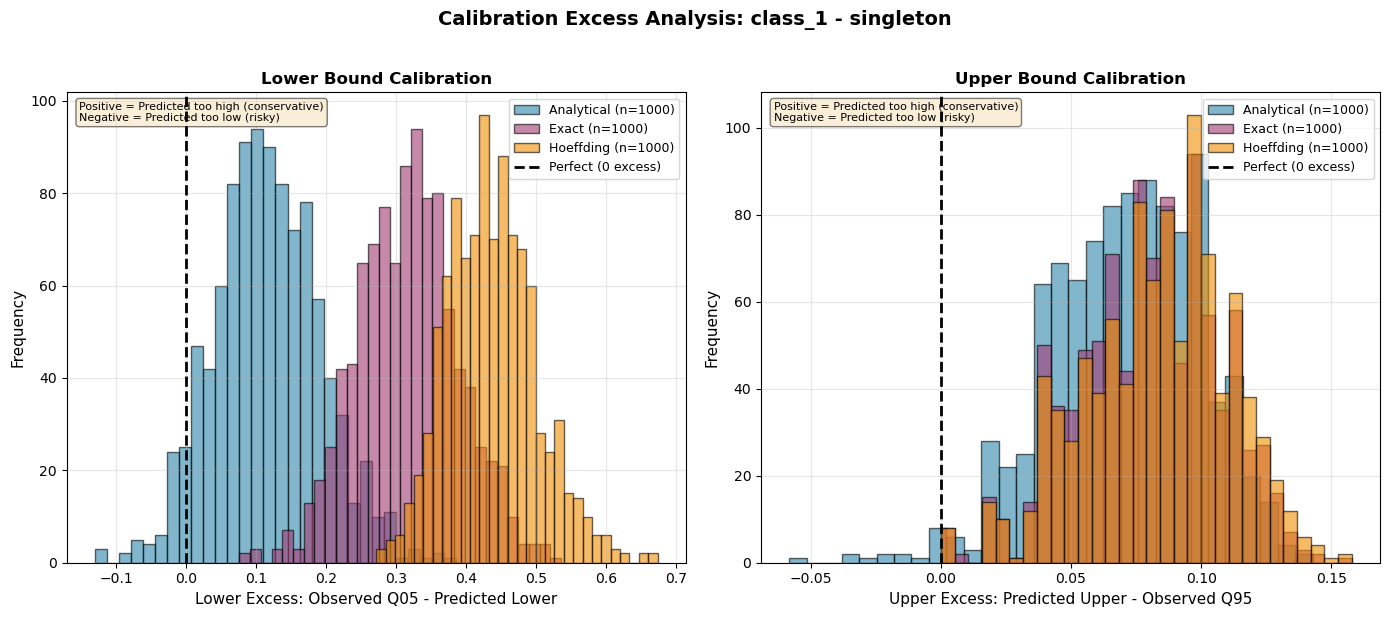

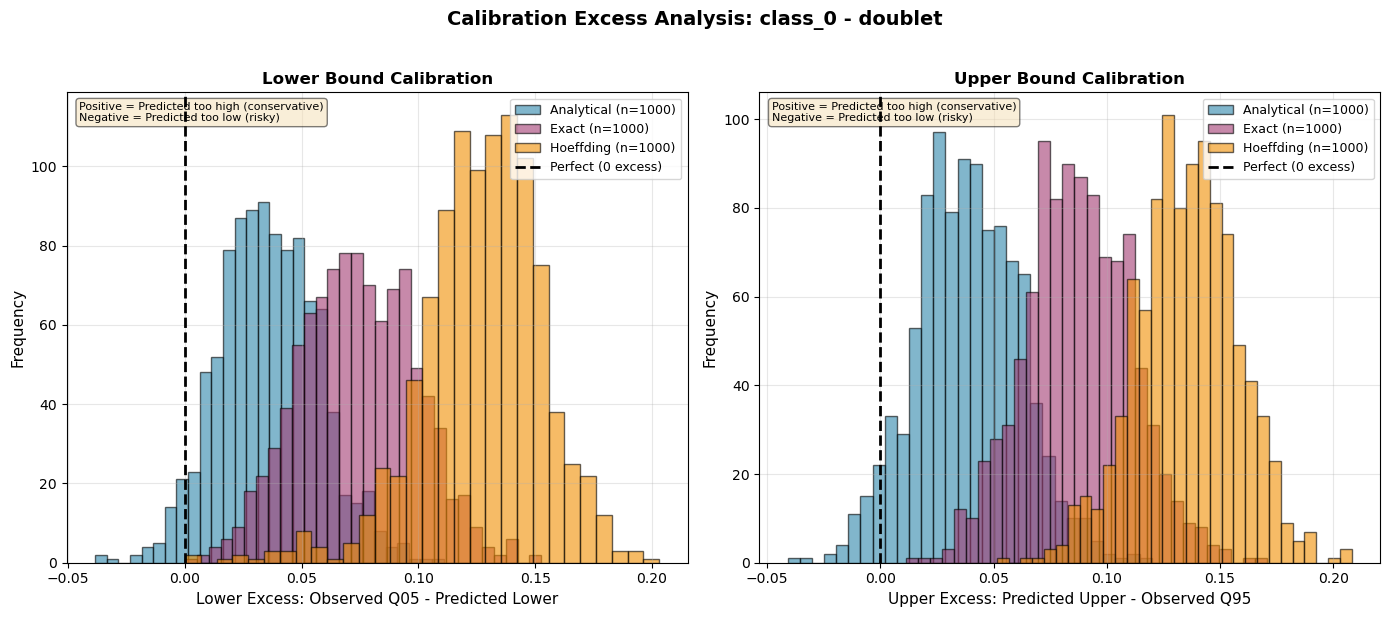

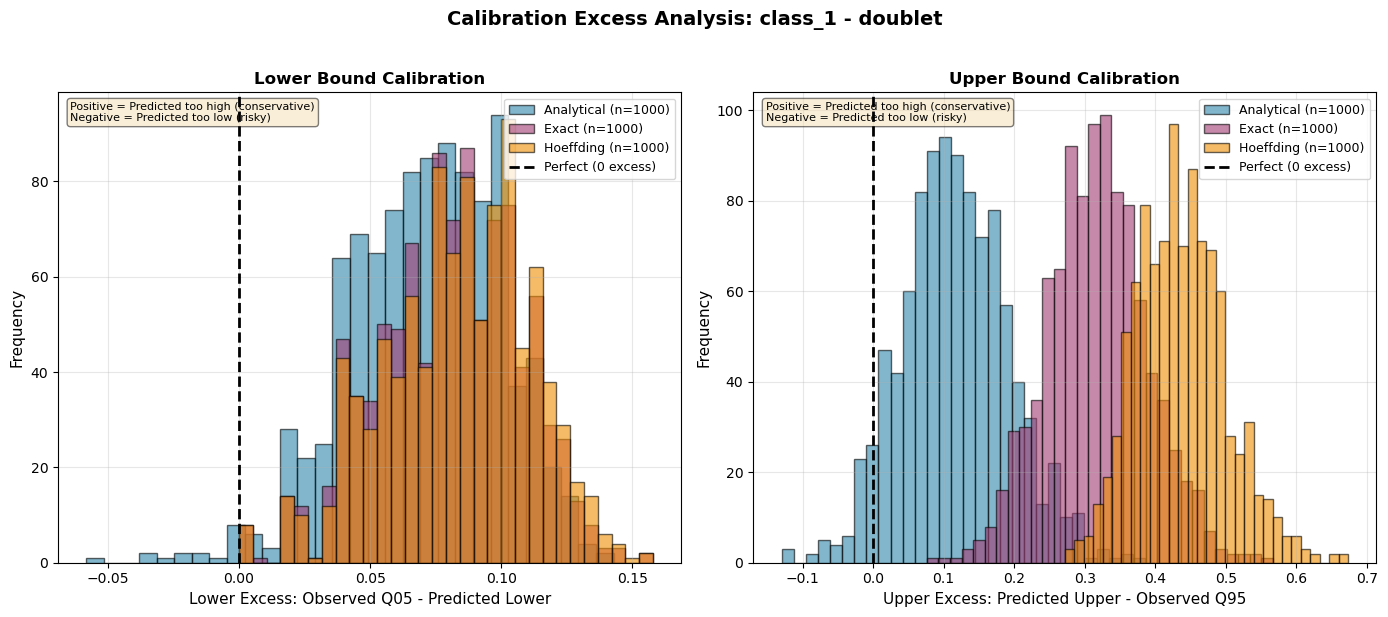

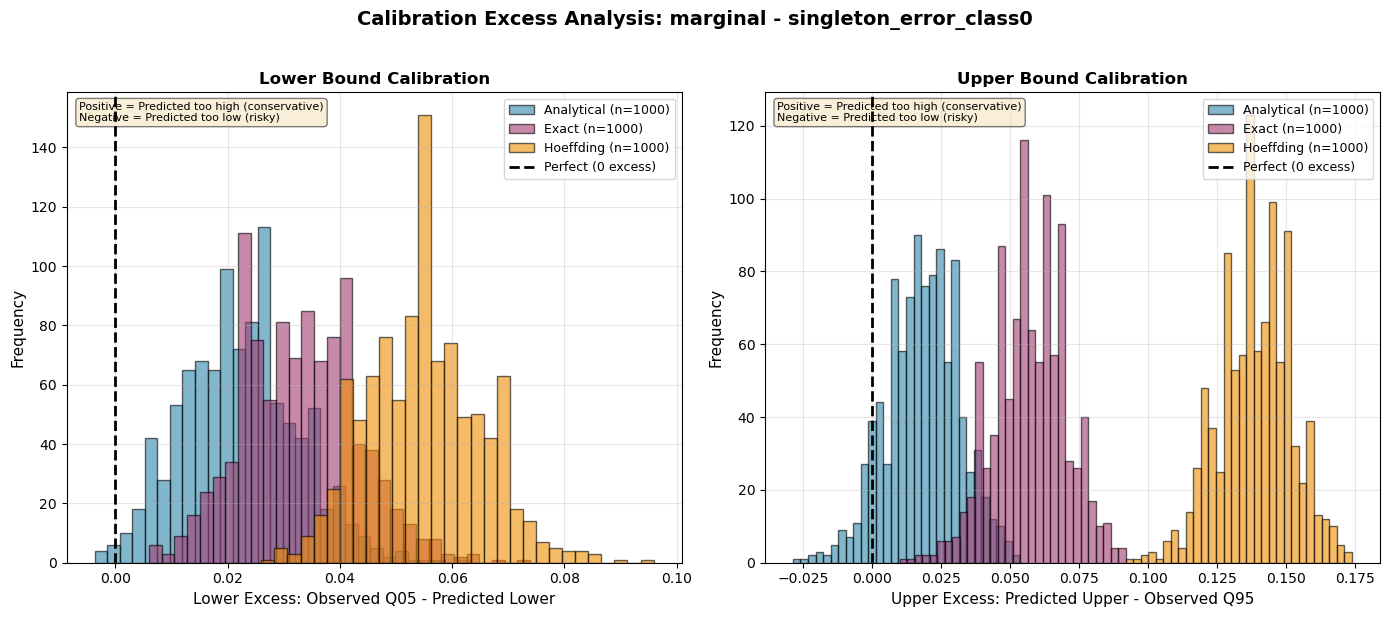

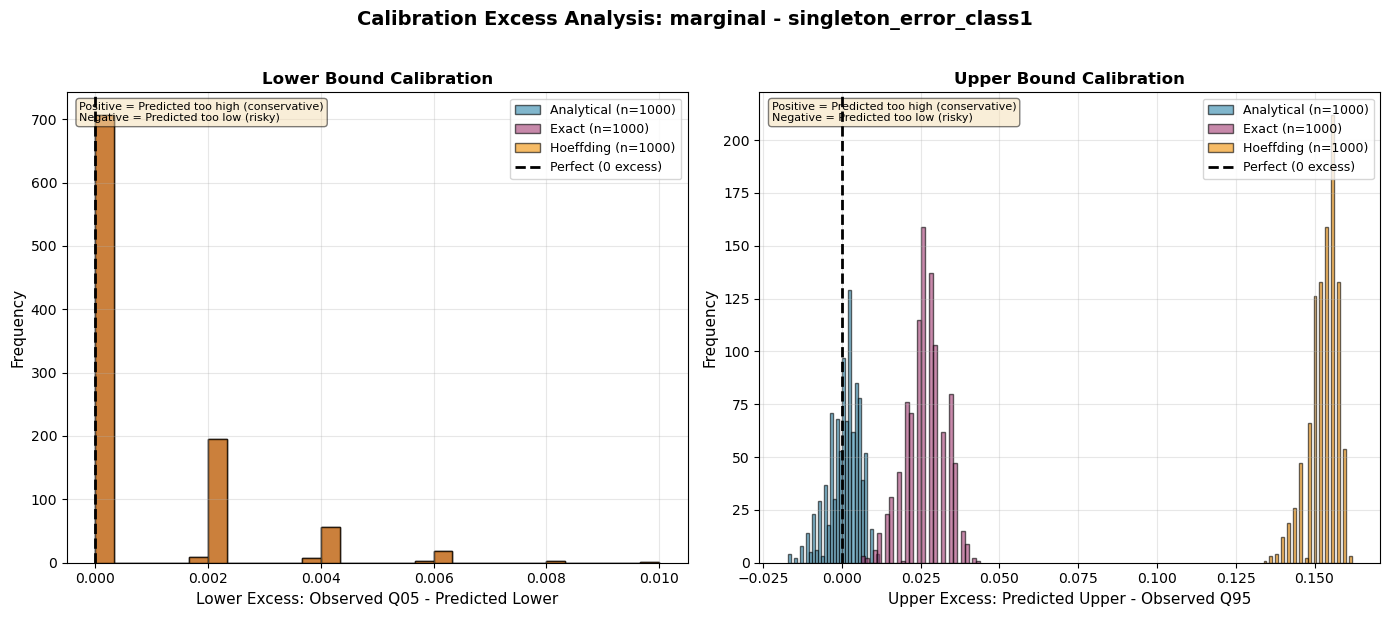

In [63]:
plotter(df2)

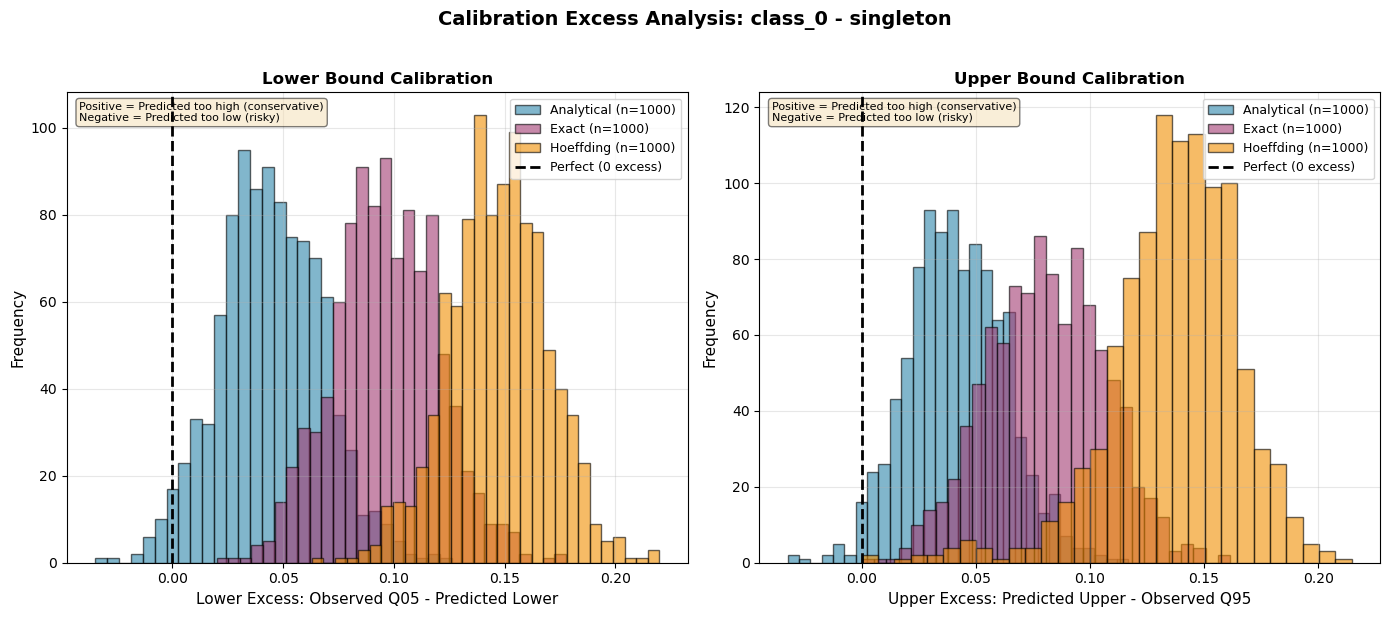

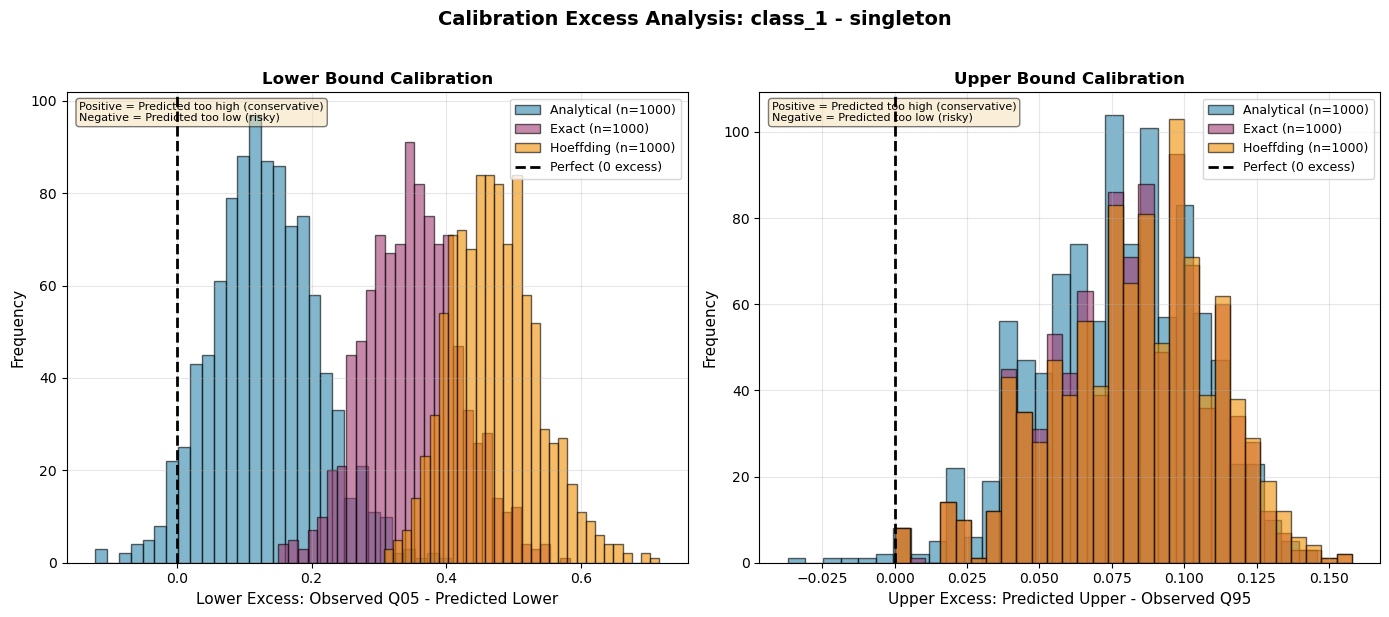

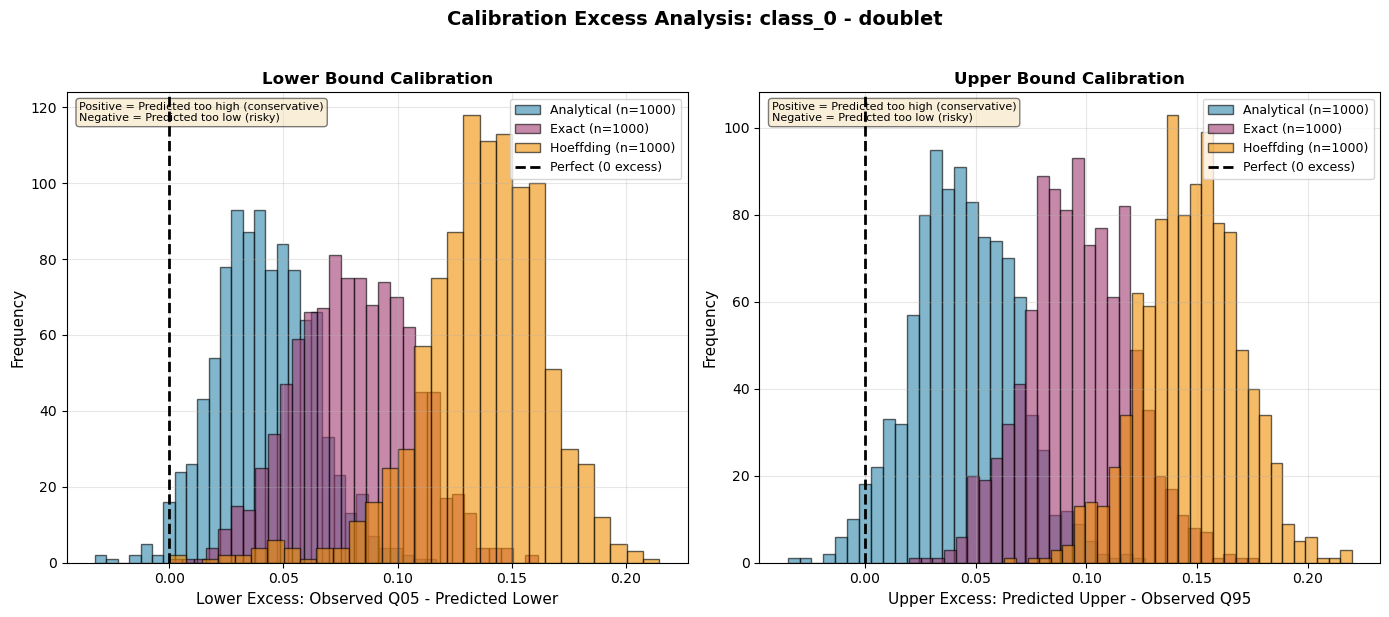

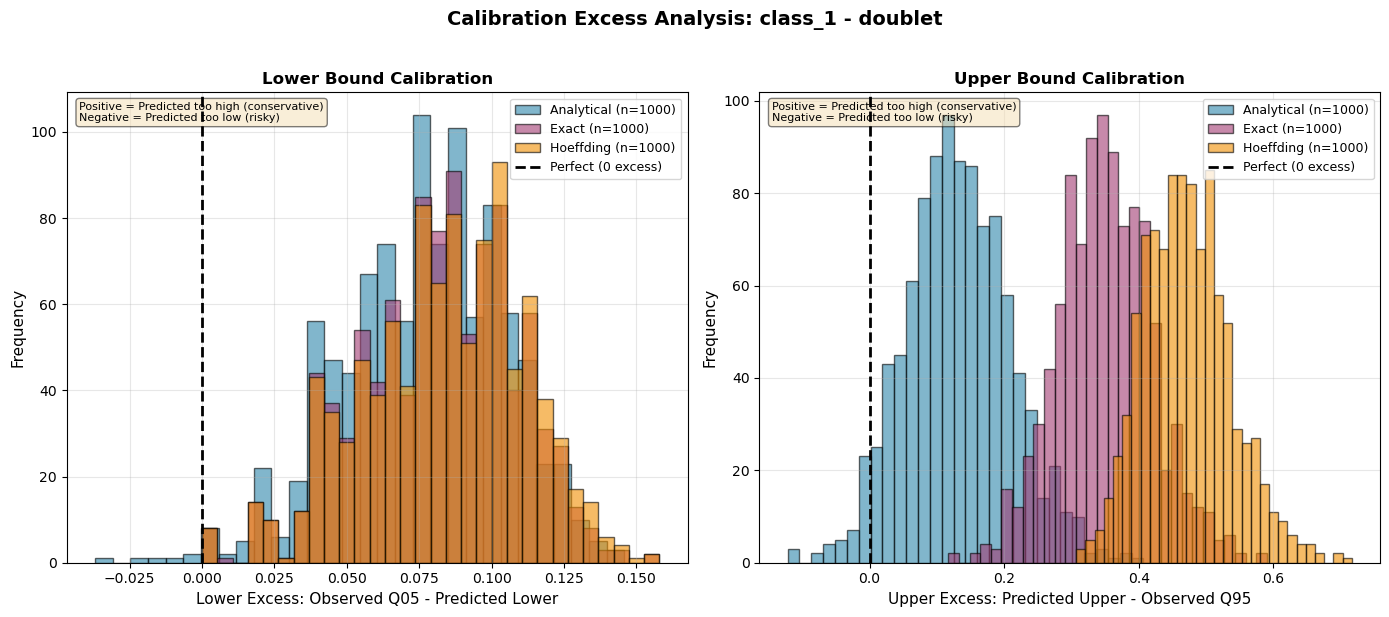

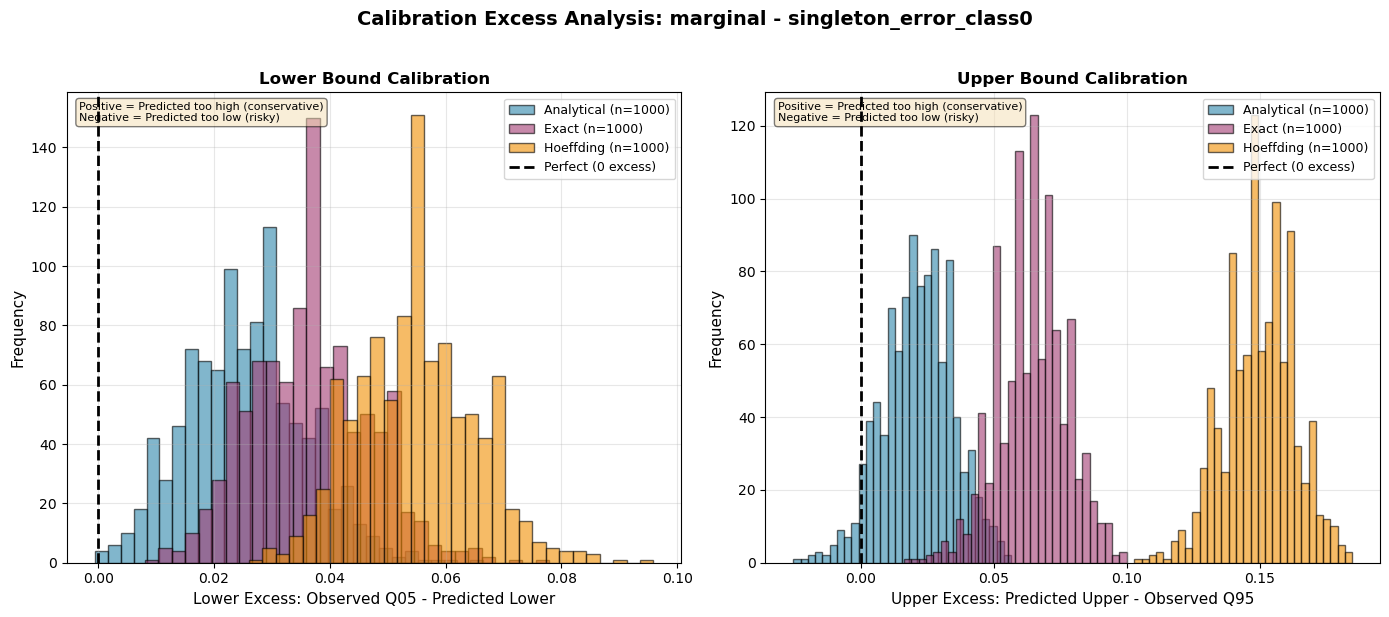

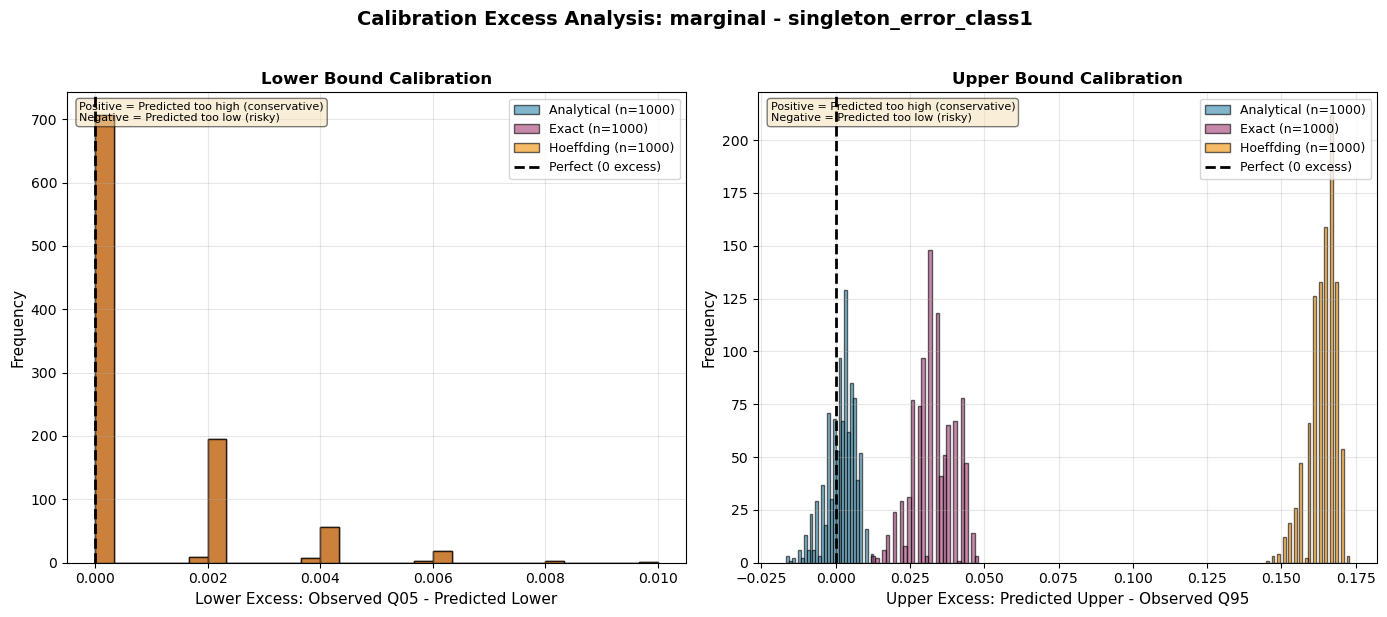

In [64]:
plotter(df25)

In [65]:
ssbc.print_calibration_validation_results(results1)

PREDICTION INTERVAL CALIBRATION VALIDATION

Configuration:
  Calibrations tested: 1000
  Calibration size: 500
  Trials per calibration: 1000
  Target confidence level: 95%

MARGINAL

SINGLETON:
  Selected:
    Mean coverage: 99.84%
    Median coverage: 100.00%
    Quantiles: [5%: 99.50%, 50%: 100.00%, 95%: 100.00%]
    Fraction ≥ 95%: 99.5% ✅
    Fraction ≥ 95%: 99.5%
  Analytical:
    Mean coverage: 94.77%
    Median coverage: 98.20%
    Quantiles: [5%: 76.68%, 50%: 98.20%, 95%: 99.60%]
    Fraction ≥ 95%: 73.5% ❌
    Fraction ≥ 95%: 73.5%
  Exact:
    Mean coverage: 99.84%
    Median coverage: 100.00%
    Quantiles: [5%: 99.50%, 50%: 100.00%, 95%: 100.00%]
    Fraction ≥ 95%: 99.5% ✅
    Fraction ≥ 95%: 99.5%
  Hoeffding:
    Mean coverage: 100.00%
    Median coverage: 100.00%
    Quantiles: [5%: 100.00%, 50%: 100.00%, 95%: 100.00%]
    Fraction ≥ 95%: 100.0% ✅
    Fraction ≥ 95%: 100.0%

DOUBLET:
  Selected:
    Mean coverage: 99.84%
    Median coverage: 100.00%
    Quantiles: [5%: